In [580]:
#Jackson Britt
#Intro to AI Practicum

import numpy as np
import matplotlib.pyplot as plt


class Neural_Net_tanh:
    def __init__(self,x,y, hiddenNum1, hiddenNum2 = 0):
        
        self.inX = x
        self.expected = y
        self.inNum = self.inX.shape[1]
        self.outNum = self.expected.shape[1]
        self.hidNum1 = hiddenNum1
        self.hidNum2 = hiddenNum2
        self.output = np.zeros(self.expected.shape)
        self.loss = []
        self.errorAvg = []
        # declare weights
        self.weightsIn = np.random.randn(self.inNum, self.hidNum1)
        
        # check if its a 4 layer network
        if self.hidNum2:
            self.weightsHid = np.random.randn(self.hidNum1, self.hidNum2)
            self.weightsOut = np.random.randn(self.hidNum2, self.outNum)
        else: 
            self.weightsOut = np.random.randn(self.hidNum1, self.outNum)
        
        
    # sigmoid function
    def sigmoid(self, v):
        return np.tanh(v)
    
    # sigmoid function derivative
    def sigmoid_derivative(self, v):
        return 1.0 - np.tanh(v)**2
        
    
    # forward propagation function
    def forward_prop(self):
        
        self.inputLayer = self.sigmoid(np.dot(self.inX, self.weightsIn))
        

        self.output = self.sigmoid(np.dot(self.inputLayer, self.weightsOut))
        
    
    def backwards_prop(self):
                                            
        
        self.error = (self.expected - self.output)
        chain_out = 2*(self.error) * self.sigmoid_derivative(self.output)
        self.dWeightsOut = np.dot(self.inputLayer.T, chain_out)
            
        chain_in = np.dot(chain_out, self.weightsOut.T) * self.sigmoid_derivative(self.inputLayer)
        self.dWeightsIn = np.dot(self.inX.T, chain_in)

        self.weightsIn += self.dWeightsIn
        self.weightsOut += self.dWeightsOut
    
    def learn(self, inX, expected, n):
        for i in range(n):
            self.forward_prop()
            self.backwards_prop()
            self.loss.append(np.mean(abs(self.dWeightsOut)))
            self.errorAvg.append(abs(np.mean(self.error)))
        
    def predict(self, inX):
        self.inX = inX
        self.forward_prop()
        return self.output
        




class Neural_Net_sigmoid:
    def __init__(self,x,y, hiddenNum1, hiddenNum2 = 0):
        
        self.inX = x
        self.expected = y
        self.inNum = self.inX.shape[1]
        self.outNum = self.expected.shape[1]
        self.hidNum1 = hiddenNum1
        self.hidNum2 = hiddenNum2
        self.output = np.zeros(self.expected.shape)
        self.loss = []
        self.errorAvg = []
        # declare weights
        self.weightsIn = np.random.randn(self.inNum, self.hidNum1)
        
        # check if its a 4 layer network
        if self.hidNum2:
            self.weightsHid = np.random.randn(self.hidNum1, self.hidNum2)
            self.weightsOut = np.random.randn(self.hidNum2, self.outNum)
        else: 
            self.weightsOut = np.random.randn(self.hidNum1, self.outNum)
        
        
    # sigmoid function
    def sigmoid(self, v):
        return 1.0/(1.0+np.exp(-v))
    
    # sigmoid function derivative
    def sigmoid_derivative(self, v):
        return v * (1-v)
        
    
    # forward propagation function
    def forward_prop(self):
        
        self.inputLayer = self.sigmoid(np.dot(self.inX, self.weightsIn))
        

        self.output = self.sigmoid(np.dot(self.inputLayer, self.weightsOut))
        
    #backwardsprop
    def backwards_prop(self):
                                            
        
        self.error = (self.expected - self.output)
        chain_out = 2*(self.error) * self.sigmoid_derivative(self.output)
        self.dWeightsOut = np.dot(self.inputLayer.T, chain_out)
            
        chain_in = np.dot(chain_out, self.weightsOut.T) * self.sigmoid_derivative(self.inputLayer)
        self.dWeightsIn = np.dot(self.inX.T, chain_in)

        self.weightsIn += self.dWeightsIn
        self.weightsOut += self.dWeightsOut
    
    def learn(self, inX, expected, n):
        for i in range(n):
            self.forward_prop()
            self.backwards_prop()
            self.loss.append(np.mean(abs(self.dWeightsOut)))
            self.errorAvg.append(abs(np.mean(self.error)))
        
    def predict(self, inX):
        self.inX = inX
        self.forward_prop()
        return self.output
        



In [581]:
X = np.array(([0.8,0.3,0.9,0.3],
              [0.4,0.7,0.3, 0.7],
              [0.6,0.4,0.8,0.9],
              [0.3,0.7,0.2,0.6],
              [0.1,0.8,0.1,0.6],
              [1.0,0.2,1.0,0.2],
              [0.3,0.3,0.6, 0.4],
              [0.4,0.6,0.4,0.8],
              [0.6,0.2,0.8,0.3],
              [0.5,0.6,0.6,1.0]), dtype=float)
y = np.array(([1],[-1],[1],[-1],[-1],[1],[1],[-1],[1],[-1]))

netDogCat = Neural_Net_tanh(X,y,4)

n = 30

netDogCat.learn(X, y, n)

print("Predicted:",np.round(netDogCat.output, decimals=3),"\nActual:", y)  



lossNorm = (netDogCat.loss/max(netDogCat.loss))
errorAvgNorm = (netDogCat.errorAvg/max(netDogCat.errorAvg))


Predicted: [[ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]] 
Actual: [[ 1]
 [-1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [-1]]


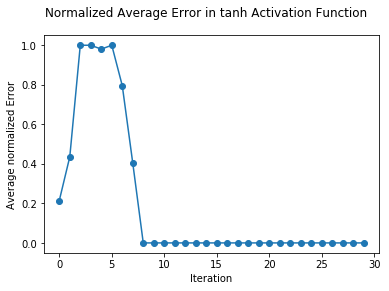

In [582]:
plt.plot(errorAvgNorm, marker='o')
# plt.plot(lossNorm, marker = 'o')
plt.suptitle('Normalized Average Error in tanh Activation Function')
plt.xlabel('Iteration')
plt.ylabel('Average normalized Error')
plt.show()

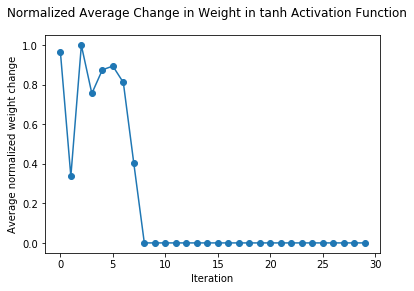

In [583]:
plt.plot(lossNorm, marker = 'o')
plt.suptitle('Normalized Average Change in Weight in tanh Activation Function')
plt.xlabel('Iteration')
plt.ylabel('Average normalized weight change')
plt.show()

In [584]:
netDogCat.predict(np.array(([.7,.3,.8,0.5]), dtype=float))

print("Predtiction:",np.round(netDogCat.output,4))



Predtiction: [ 1.]


In [585]:
X = np.array(([0.8,0.3,0.9,0.3],
              [0.4,0.7,0.3, 0.7],
              [0.6,0.4,0.8,0.9],
              [0.3,0.7,0.2,0.6],
              [0.1,0.8,0.1,0.6],
              [1.0,0.2,1.0,0.2],
              [0.3,0.3,0.6, 0.4],
              [0.4,0.6,0.4,0.8],
              [0.6,0.2,0.8,0.3],
              [0.5,0.6,0.6,1.0]), dtype=float)
y = np.array(([1],[0],[1],[0],[0],[1],[1],[0],[1],[0]))

netDogCat = Neural_Net_sigmoid(X,y,4)

n = 30

netDogCat.learn(X, y, n)

print("Predicted:",np.round(netDogCat.output, decimals=3),"\nActual:", y)  



lossNorm = (netDogCat.loss/max(netDogCat.loss))
errorAvgNorm = (netDogCat.errorAvg/max(netDogCat.errorAvg))


Predicted: [[ 0.986]
 [ 0.052]
 [ 0.832]
 [ 0.034]
 [ 0.013]
 [ 0.994]
 [ 0.831]
 [ 0.1  ]
 [ 0.981]
 [ 0.198]] 
Actual: [[1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]]


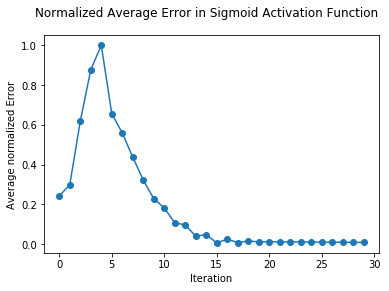

In [586]:
plt.plot(errorAvgNorm, marker='o')
# plt.plot(lossNorm, marker = 'o')
plt.suptitle('Normalized Average Error in Sigmoid Activation Function')
plt.xlabel('Iteration')
plt.ylabel('Average normalized Error')
plt.show()

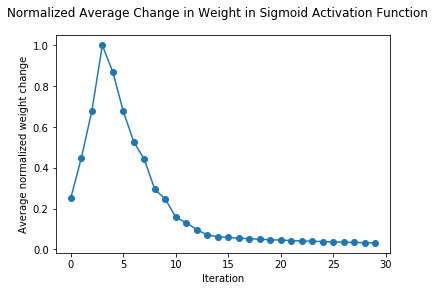

In [587]:
plt.plot(lossNorm, marker = 'o')
plt.suptitle('Normalized Average Change in Weight in Sigmoid Activation Function')
plt.xlabel('Iteration')
plt.ylabel('Average normalized weight change')
plt.show()